/home/ubuntu/project4-venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Разморожен слой: encoder.layer.11.attention.self.query.weight
Разморожен слой: encoder.layer.11.attention.self.query.bias
Разморожен слой: encoder.layer.11.attention.self.key.weight
Разморожен слой: encoder.layer.11.attention.self.key.bias
Разморожен слой: encoder.layer.11.attention.self.value.weight
Разморожен слой: encoder.layer.11.attention.self.value.bias
Разморожен слой: encoder.layer.11.attention.output.dense.weight
Разморожен слой: encoder.layer.11.attention.output.dense.bias
Разморожен слой: encoder.layer.11.attention.output.LayerNorm.weight
Разморожен слой: encoder.layer.11.attention.output.LayerNorm.bias
Разморожен слой: encoder.layer.11.intermediate.dense.weight
Разморожен слой: encoder.layer.11.intermediate.dense.bias
Разморожен слой: encoder.layer.11.output.dense.weight
Разморожен слой: encoder.layer.11.output.dense.bias
Разморожен слой: encoder.layer.11.output.LayerNorm.weight
Разморожен слой: encoder.layer.11.output.LayerNorm.bias
Разморожен слой: pooler.dense.weight
Раз

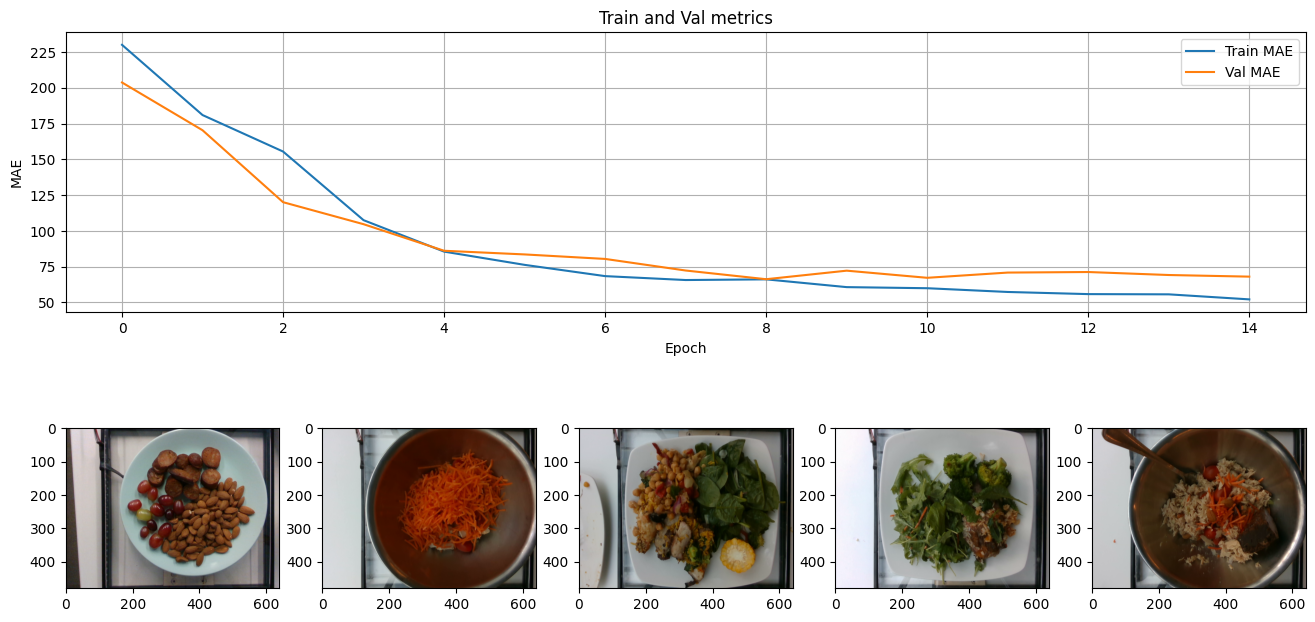

In [1]:

import torch
import matplotlib.pyplot as plt
from PIL import Image

from project4_dataset import MultimodalDataset, collate_fn, get_transforms
from project4_utils import train

class Config:
    SEED = 42

    IMAGE_MODEL_NAME = 'tf_efficientnet_b0'
    TEXT_MODEL_NAME = 'bert-base-uncased'
    
    IMAGE_MODEL_UNFREEZE = 'blocks.6|conv_head|bn2'
    TEXT_MODEL_UNFREEZE = 'encoder.layer.11|pooler'

    BATCH_SIZE = 256
    TEXT_LR = 0.03
    IMAGE_LR = 0.03
    MASS_LR = 0.03
    CALCULATOR_LR = 0.03
    EPOCHS = 15
    DROPOUT = 0.3
    HIDDEN_DIM = 256

    DISH_DF_PATH = 'data/project/dish.csv'
    IMAGES_PATH = 'data/project/images'
    SAVE_PATH = 'best_model.pth'

device = 'cuda' if torch.cuda.is_available() else 'cpu'

config = Config()

result_epochs, result_train, result_val, worst5 = train(config, device)

plt.figure(figsize=(16, 8))
plt.subplot(2, 5, (1, 5))
plt.plot(result_epochs, result_train, label='Train MAE')
plt.plot(result_epochs, result_val, label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Train and Val metrics')
plt.legend()
plt.grid(True)
for i, v in enumerate(worst5):
    plt.subplot(2, 5, 5+1+i)
    img = Image.open(worst5[i]['img'])
    plt.imshow(img, cmap='gray')
plt.show()